Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [100]:
from random import random, seed
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [101]:
UNIVERSE_SIZE = 1000
NUM_SETS = 200
DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [102]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [103]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    phenotype = np.logical_or.reduce(SETS[solution])
    return np.all(phenotype)


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Have Fun!

In [104]:
# A dumb solution of "all" sets
solution = np.full(NUM_SETS, True)
valid(solution), cost(solution)

(np.True_, np.float64(106819.16013898345))

In [105]:
# A random solution with random 50% of the sets
solution = rng.random(NUM_SETS) < .5
valid(solution), -cost(solution)

(np.True_, np.float64(-55527.00099620504))

In [106]:
def single_mutation_tweak(solution: np.ndarray) -> np.ndarray:
    """Tweaks the solution by flipping a random set, i.e. not taking it if it was taken and vice versa"""
    new_sol = solution.copy()
    idx = rng.integers(NUM_SETS)
    new_sol[idx] = not new_sol[idx]
    return new_sol

def multi_mutation_tweak(solution: np.ndarray) -> np.ndarray:
    new_sol = solution.copy()
    """Create a random mask of sets to be flipped and apply it to the solution,
        flip only if the mask is True and the set is already taken"""
    mask = rng.random(NUM_SETS) < 0.01
    new_sol = np.logical_xor(new_sol, mask)

    return new_sol

In [107]:
def fitness(solution: np.ndarray) -> float:
    """Returns the fitness of a solution"""
    return (valid(solution), -cost(solution))

ic| solution_fitness: (np.True_, np.float64(-106819.16013898345))
ic| fitness(solution): (np.True_, np.float64(-6689.330630597301))


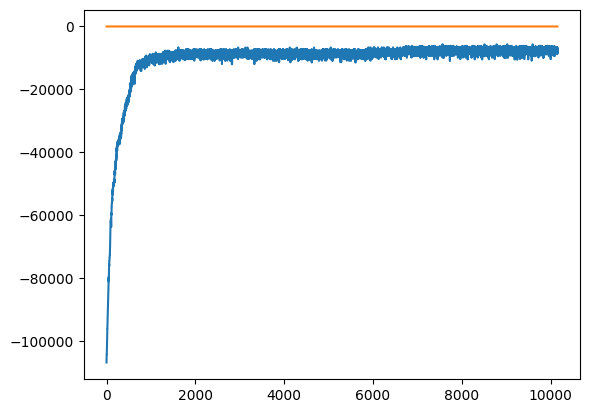

In [108]:
#Vector of all true, keeping all sets and shit
solution = rng.random(NUM_SETS) < 1
solution_fitness = fitness(solution)
ic(solution_fitness)
full_history = [(-cost(solution), 1)]

tweak = multi_mutation_tweak
for steps in range(10000):
    new_solution = tweak(solution)
    full_history.append((-cost(new_solution), 0))
    #if new solution is better than last one take it
    if fitness(new_solution) > fitness(solution):
        solution = new_solution
        full_history.append((-cost(solution), 1))
        
        #ic(fitness(solution))
#ic(solution)
ic(fitness(solution))
plt.plot(full_history)
#plot as points
